In [1]:
%matplotlib notebook
import matplotlib
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import numpy.polynomial.chebyshev as chebyshev
from itertools import *

<IPython.core.display.Javascript object>


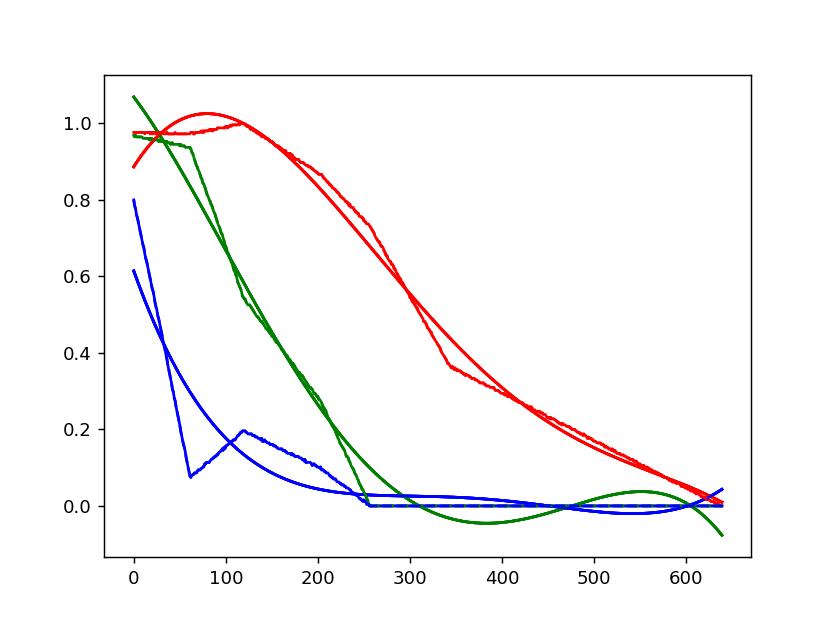

In [15]:
img = Image.open('./flame.png')
colors = np.array([img.getpixel((i, 0)) for i in range(img.size[0])])
r, g, b = np.array_split(colors.transpose() / 255, 3, axis=0)
r = r[0]; g = g[0]; b = b[0]

plt.plot(r, 'r')
plt.plot(g, 'g')
plt.plot(b, 'b')

[ -7.42828172  13.49066809  -9.02608052   3.68452288  -0.71117265] [-4.56657944  8.57004895 -6.62752371  3.5393551  -0.99186063] [  8.60556488 -14.57317637   8.7124878   -3.42279269   0.7211981 ]


<IPython.core.display.Javascript object>


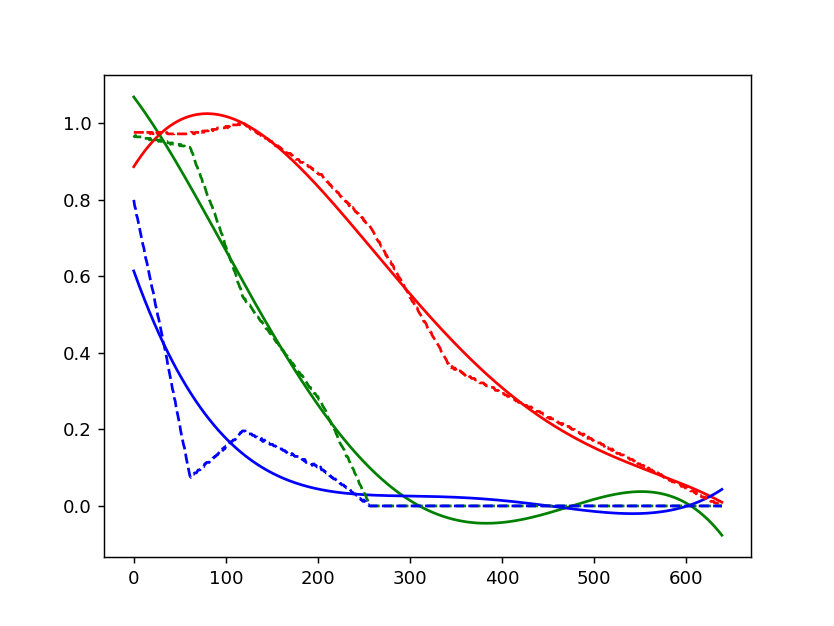

<IPython.core.display.Javascript object>


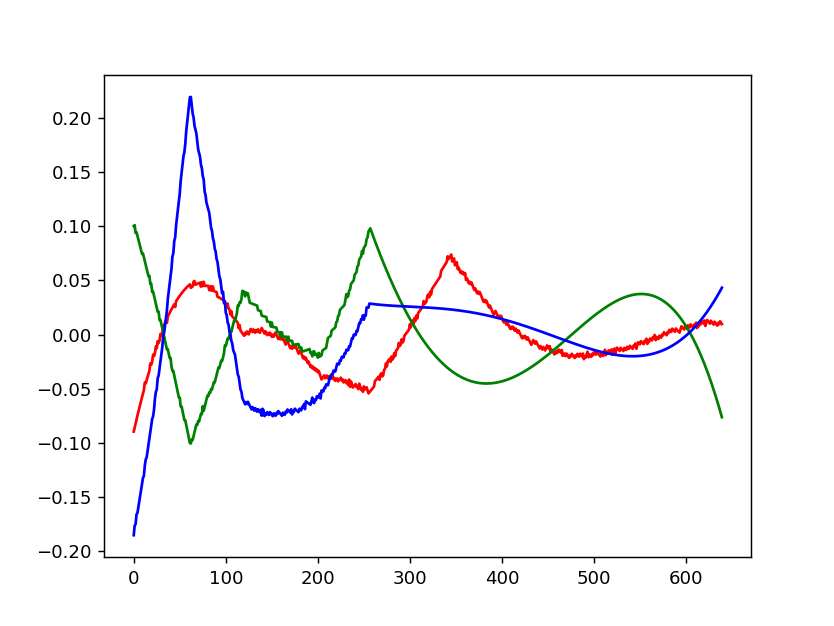

1.93133368141


In [37]:
xs = np.linspace(0, 1, r.shape[0])
approx_ord = 4;
cr = chebyshev.chebfit(xs, r, approx_ord)
cg = chebyshev.chebfit(xs, g, approx_ord)
cb = chebyshev.chebfit(xs, b, approx_ord)

print(cr, cg, cb)

plt.figure()

plt.plot(chebyshev.chebval(xs, cr[:5]), 'r')
plt.plot(chebyshev.chebval(xs, cg), 'g')
plt.plot(chebyshev.chebval(xs, cb), 'b')

plt.plot(r, 'r--')
plt.plot(g, 'g--')
plt.plot(b, 'b--')

plt.figure()

re = chebyshev.chebval(xs, cr) - r
ge = chebyshev.chebval(xs, cg) - g
be = chebyshev.chebval(xs, cb) - b

plt.plot(re, 'r')
plt.plot(ge, 'g')
plt.plot(be, 'b')

print(np.sqrt(np.sum(re * re + ge * ge + be * be)))